In [185]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import win32file
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import boutdata

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"C:\Users\mikek\OneDrive\Project\python-packages\sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from cli.cmonitor import *
from hermes3.logparse import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# IO

In [279]:
db = CaseDB(
    # case_dir = r"/ssd_scratch/hcases",
    # grid_dir = r"/ssd_scratch/hcases"
    )

toload = [ 
    
    
    # dict(name="cvode", id="t1ab-base_dynamic", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid", id="t4ca-beuler_euclid_level_0_dynamic", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_stol_1e-7_rtol_1e-8", id="t4cab-beuler_euclid_level_0_dynamic_stol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_stol_1e-8_rtol_1e-6", id="t4cad-beuler_euclid_level_0_dynamic_stol_1e-8_rtol1e-6", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_stol_1e-8_rtol_1e-5", id="t4cae-beuler_euclid_level_0_dynamic_stol_1e-8_rtol1e-5", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_stol_1e-8_rtol_1e-8_atol_1e-10", id="t4caf-beuler_euclid_level_0_dynamic_atol_1e-10", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_bj", id="t4cba-beuler_euclid_level_0_bj_dynamic", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut", id="t7ab-beuler_pilut_dynamic", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
    ### Compare solvers
    dict(name="cvode", id="t1a-base_steady", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="euclid_level0", id="t4c-beuler_euclid_level_0", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="pilut_droptol_1e-7", id="t7c-beuler_pilut_droptol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="remkit_default", id="t8a-beuler_remkit_default", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
    ### Euclid level tests
    # dict(name="euclid_level0", id="t4c-beuler_euclid_level_0", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_level1 (def.)", id="t4a-beuler_euclid_rtol_1e-8", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="euclid_level3", id="t4b-beuler_euclid_level_3", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
    ### PILUT droptol test
    # dict(name="pilut_droptol_1e-6", id="t7b-beuler_pilut_droptol_1e-6", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_droptol_1e-7", id="t7c-beuler_pilut_droptol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_droptol_1e-8", id="t7d-beuler_pilut_droptol_1e-8", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
    
    # ### PILUT rowsize test
    # dict(name="pilut_rowsize_30", id="t7cb-beuler_pilut_droptol_1e-7_factrowsz_30", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_rowsize_20 (def.)", id="t7c-beuler_pilut_droptol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_rowsize_10", id="t7ca-beuler_pilut_droptol_1e-7_factrowsz_10", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_rowsize_5", id="t7cc-beuler_pilut_droptol_1e-7_factrowsz_5", unnormalise_geom = True, use_xhermes = True, squash = True), 
    
    # ### Euclid tol tests
    # dict(name="pilut_rowsize_30", id="t4cab-beuler_euclid_level_0_dynamic_stol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_rowsize_20", id="t4cab-beuler_euclid_level_0_dynamic_stol_1e-7", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_rowsize_10", id="t7ca-beuler_pilut_droptol_1e-7_factrowsz_10", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="pilut_rowsize_5", id="t7cc-beuler_pilut_droptol_1e-7_factrowsz_5", unnormalise_geom = True, use_xhermes = True, squash = True), 

    

    
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case t1a-base_steady
-----------------------
- Looking for squash file
- Squash file found. squash date 08/23/2024, 19:06:43, dmp file date 08/20/2024, 16:35:00


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t4c-beuler_euclid_level_0
-----------------------
- Looking for squash file
- Squash file found. squash date 08/26/2024, 14:45:14, dmp file date 08/24/2024, 18:13:51


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t7c-beuler_pilut_droptol_1e-7
-----------------------
- Looking for squash file
- Squash file found. squash date 08/26/2024, 17:14:53, dmp file date 08/24/2024, 18:07:20


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
- Reading case t8a-beuler_remkit_default
-----------------------
- Looking for squash file
- Squash file found. squash date 08/26/2024, 16:31:13, dmp file date 08/24/2024, 20:44:35


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


In [16]:
for case in cs:
    print(cs[case].ds["t"].values[0], cs[case].ds["t"].values[1])

0.3749397120054698 0.3749449318478471
0.39002505647573504 0.39007725489950756


# Profile history

Text(0.5, 1.0, 'Nesep evolution')

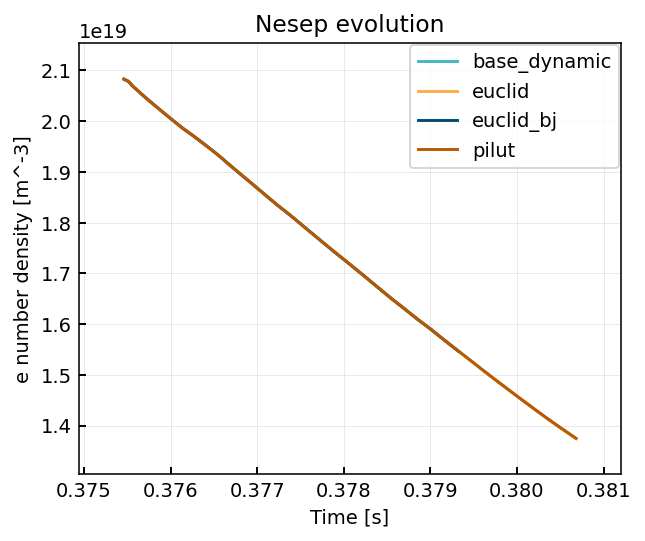

In [240]:
fig, ax = plt.subplots()

for case in cs:

    ds = cs[case].ds

    sep_omp = ds.hermesm.select_region("outer_midplane_a_sep")    
    sep_omp["Ne"].plot(ax = ax, label = case)
    
ax.legend()
ax.set_title("Nesep evolution")

In [ ]:
fig, axes = plt.subplots(2,4, figsize=figsize, dpi = dpi)
fig.subplots_adjust(hspace=0.4, top = 0.85)
fig.suptitle(casename, y = 1.02)

# Performance

In [143]:
%matplotlib inline

In [ ]:
        # simtime, ncalls, wtime, 100. * (wtime_rhs - wtime_comms - wtime_invert) / wtime,
        # 100. * wtime_invert / wtime,                    // Inversions
        # 100. * wtime_comms / wtime,                     // Communications
        # 100. * wtime_io / wtime,                        // I/O
        # 100. * (wtime - wtime_io - wtime_rhs) / wtime); // Everything else

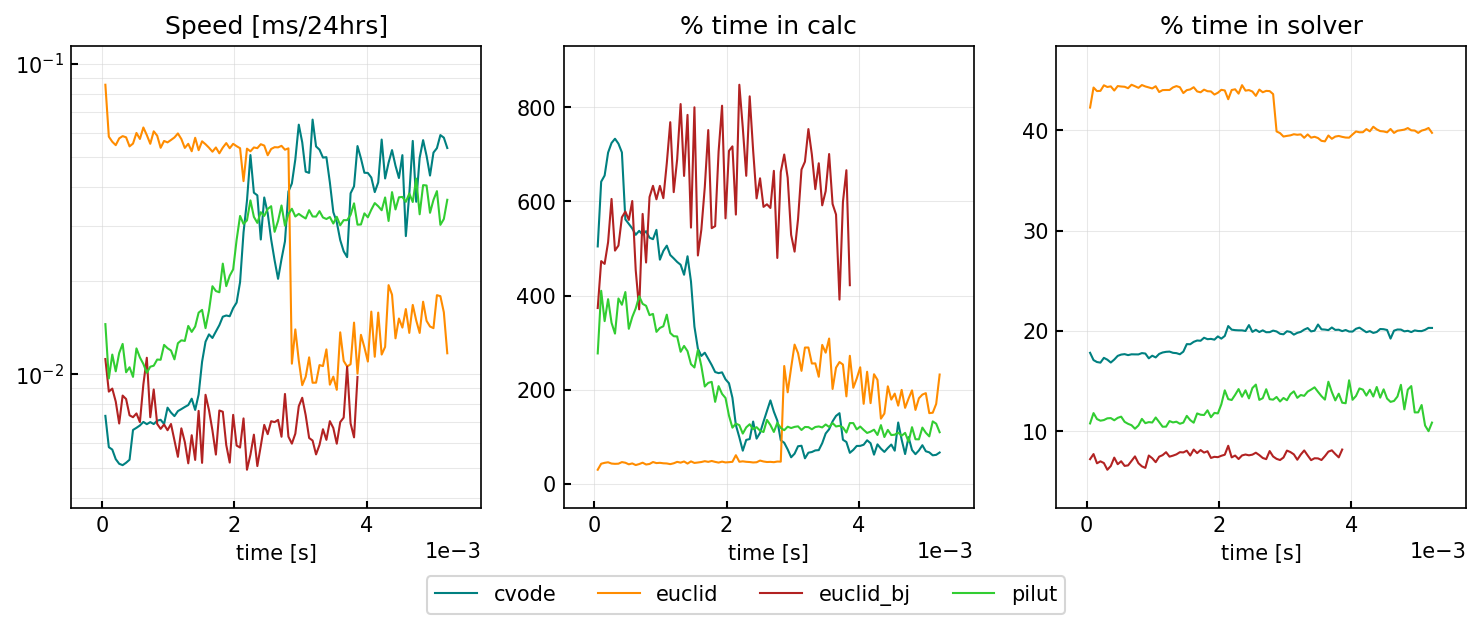

In [243]:
from cycler import cycler
scale = 1.0
figsize = (12*scale,4*scale)
dpi = 150/scale
fig, axes = plt.subplots(1,3, figsize=figsize, dpi = dpi)
for ax in axes:
    ax.set_prop_cycle(cycler("color", ["teal", "darkorange", "firebrick", "limegreen", "darkorchid", "deeppink", 
                                                   "#1E90FF", "forestgreen", "#4169e1", "darkgoldenrod", "#9370db", "crimson", "#2f4f4f" ]))

style = dict(lw = 1)

for case in cs:
    
    ds = cs[case].ds
    
    ax = axes[0]
    
    stime = np.diff(ds["t"].values, prepend = ds["t"].values[0]*0.99)
    ms_per_24hrs = (stime) / (ds["wtime"].values/(60*60*24))  # ms simulated per 24 hours
    
    normtime = ds["t"] - ds["t"][0]
    
    ax.plot(normtime[1:], ms_per_24hrs[1:], label = case, **style)
    ax.set_yscale("log")
    ax.set_title("Speed [ms/24hrs]")
    
    ax = axes[1]
    calc = 100 * (ds["wtime_rhs"] - ds["wtime_comms"] - ds["wtime_invert"]) / ds["wtime"]  * 100
    ax.plot(normtime[1:], ds["wtime_rhs"][1:], **style)
    # ax.set_yscale("log")
    ax.set_title("% time in calc")
    
    ax = axes[2]
    solver = (ds["wtime"] - ds["wtime_io"] - ds["wtime_rhs"]) / ds["wtime"] * 100
    ax.plot(normtime[1:], solver[1:], **style)
    # ax.set_yscale("log")
    ax.set_title("% time in solver")
    
    # ax = axes[3]
    # ax.plot(normtime[1:], ds["wtime_invert"][1:], **style)
    # ax.legend()
    # # ax.set_yscale("log")
    # ax.set_title("wtime_invert")
    
for ax in axes:
    ax.set_xlabel("time [s]")
fig.legend(loc = "upper center", bbox_to_anchor = (0.5, 0), ncol = 4)

In [292]:
cs.keys()

dict_keys(['cvode', 'euclid_level0', 'pilut_droptol_1e-7', 'remkit_default'])

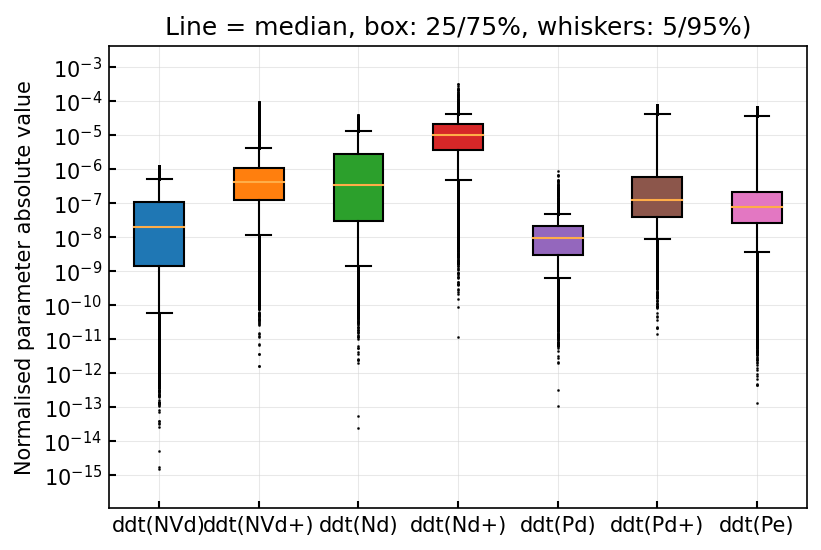

In [322]:
ds = cs["cvode"].ds
m = ds.metadata

# for param in ["Ne", "Te"]:


fig, ax = plt.subplots(figsize = (6,4), dpi = 150)    

# bins = 100000

toplot = {}
# params = ["NVd", "NVd+", "Nd", "Nd+", "Pd", "Pd+", "Pe"]
params = ["ddt(NVd)", "ddt(NVd+)", "ddt(Nd)", "ddt(Nd+)", "ddt(Pd)", "ddt(Pd+)", "ddt(Pe)"]
colors = [plt.get_cmap("tab10")(x) for x in range(len(params))]

for i, param in enumerate(params):
    param_norm = (ds[param] / ds[param].attrs["conversion"]).hermesm.clean_guards()
    param_norm = abs(param_norm).values.flatten()
    param_norm = param_norm[param_norm != 0] # Remove zeros   
    
    if len(np.where(np.isnan(param_norm))[0]) > 0:
        print(f"WARNING: NaNs found in {param}!")  
        param_norm = param_norm[~np.isnan(param_norm)]
               
    toplot[param] = param_norm

bplot = ax.boxplot(list(toplot.values()), labels = params, patch_artist = True, whis = (5, 95), flierprops = {"ms":1, "markerfacecolor":"k", "color":"grey", "mew":0.2})

for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
    
ax.set_yscale("log")
ax.grid(alpha=0.5)
ax.set_ylabel("Normalised parameter absolute value")
ax.set_title("Line = median, box: 25/75%, whiskers: 5/95%)")


ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=15))

ax.autoscale()

print()

In [310]:
a = toplot["ddt(NVd+)"]

np.where(np.isnan(a))[0]


array([174, 198], dtype=int64)

In [297]:
a

array([0.01575105, 0.02176081, 0.01224192, ..., 0.02894357, 0.86714876,
       0.03043183])

In [226]:

logs = dict(
    euclid = r"C:\Users\mikek\OneDrive\Project\collab\tech\slogs\t4c-beuler_euclid_level_0.out",
    pilut = r"C:\Users\mikek\OneDrive\Project\collab\tech\slogs\t7c-beuler_pilut_droptol_1e-7.out",
    remkit = r"C:\Users\mikek\OneDrive\Project\collab\tech\slogs\t8a-beuler_remkit_default.out"
)

df = pd.DataFrame()
orig_df = {}
dfs = []

for case in logs:
    orig_df[case] = parse_petsc_logview(logs[case])
    dfs.append(orig_df[case]["time_max"].sort_values(ascending = False).diff(-1))
    
for i, _ in enumerate(dfs):
    print(i)
    
    if i == 0:
        df = dfs[i].copy()
    if i > 0:
        df = pd.merge(df, dfs[i], left_index = True, right_index = True)

df = abs(df)
df.columns = logs.keys()


0
1
2


In [233]:
df = df.loc[~(df < 10).all(axis=1)].dropna()
# df.plot()
display_dataframe(df, format = "{:.0f}")

,euclid,pilut,remkit
Total_BOUT++,12,19,14
SNESSolve,365,151,721
MatFDColorFunc,49,191,2134
PCSetUp,110,8,0
SNESFunctionEval,23,25,150
KSPSolve,2,16,78
SNESLineSearch,27,32,295
PCApply,20,3,6
VecMDot,1,1,15
VecScatterBegin,3,1,10


In [224]:
orig_df["euclid"].sort_values("global_t", ascending = False).head(10)

,count_max,count_ratio,time_max,time_ratio,flop_max,flop_ratio,mess,avglen,reduct,global_t,global_f,global_m,global_l,global_r,stage_t,stage_f,stage_m,stage_l,stage_r,total
Total_BOUT++,1.0,1.0,628.580,1.0,5.930000e+10,1.0,24000000.0,600.0,2200000.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,934.0
SNESSolve,22456.0,1.0,616.280,1.0,5.930000e+10,1.0,24000000.0,600.0,2200000.0,98.0,100.0,100.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,952.0
SNESJacobianEval,2629.0,1.0,251.050,1.0,5.990000e+08,1.0,0.0,0.0,4900.0,40.0,1.0,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,24.0
MatFDColorFunc,212949.0,1.0,250.640,1.0,3.580000e+08,1.0,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,14.0
MatFDColorApply,2629.0,1.0,251.040,1.0,5.990000e+08,1.0,0.0,0.0,4900.0,40.0,1.0,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,24.0
PCSetUp,2629.0,1.0,201.980,1.0,0.000000e+00,0.0,0.0,0.0,5300.0,32.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0
SNESFunctionEval,77128.0,1.0,91.631,1.0,1.300000e+08,1.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,14.0
KSPSolve,56207.0,1.0,69.038,1.0,5.610000e+10,1.0,22000000.0,600.0,1900000.0,11.0,95.0,94.0,94.0,88.0,11.0,95.0,94.0,94.0,88.0,8047.0
SNESLineSearch,54197.0,1.0,67.321,1.0,2.470000e+09,1.0,1300000.0,600.0,220000.0,11.0,4.0,6.0,6.0,10.0,11.0,4.0,6.0,6.0,10.0,361.0
PCApply,983702.0,1.0,39.864,1.6,0.000000e+00,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
        # print(line)
        # if "--- Event Stage" in line:
        #     read = True
        # if "Memory usage is given in bytes:" in line:
        #     break

        # if read:
        #     lines.append(line)
    

In [99]:
cs.keys()

dict_keys(['quicktest_1e-5'])

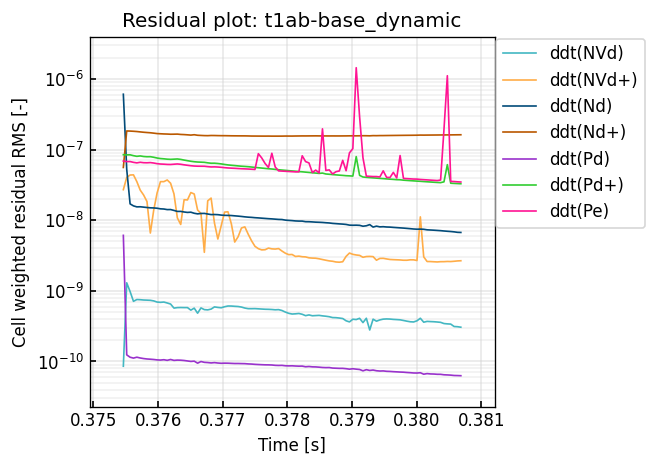

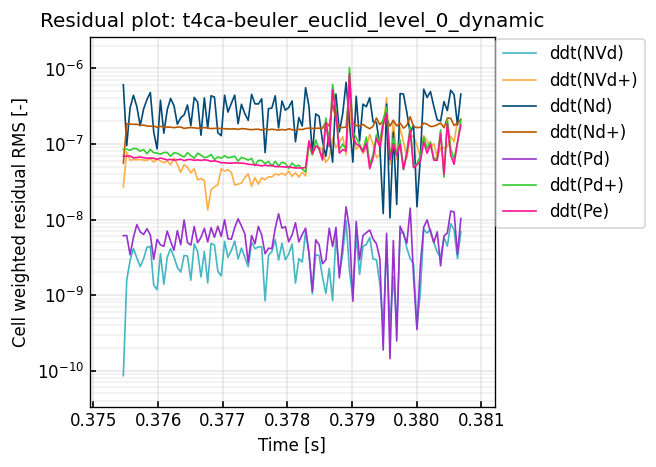

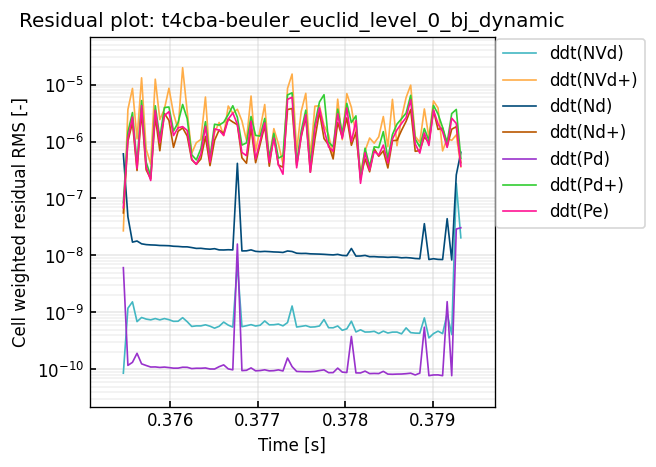

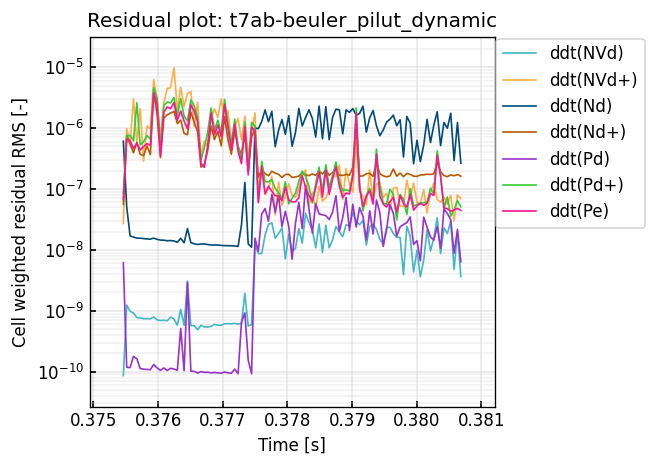

In [253]:

for name in cs:
    plot_ddt(cs[name])

In [29]:
ds.hermesm.get_cvode_metrics()
ds.dims

C:\Users\mikek\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:9: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDataArrayAccessor'> under name 'hermesm' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  class HermesDataArrayAccessor(BoutDataArrayAccessor):
C:\Users\mikek\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:46: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDatasetAccessor'> under name 'hermesm' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class HermesDatasetAccessor(BoutDatasetAccessor):


Frozen({'x': 20, 'theta': 58, 't': 48})

In [35]:
[print(x) for x in ds.data_vars if "cvode" in x]

cvode_last_order
cvode_last_step
cvode_nfevals
cvode_nliters
cvode_nniters
cvode_nonlin_fails
cvode_npevals
cvode_nsteps
cvode_num_fails
cvode_stab_lims


[None, None, None, None, None, None, None, None, None, None]

# Convergence

In [7]:
cs.keys()

dict_keys(['pilut_dynamic'])

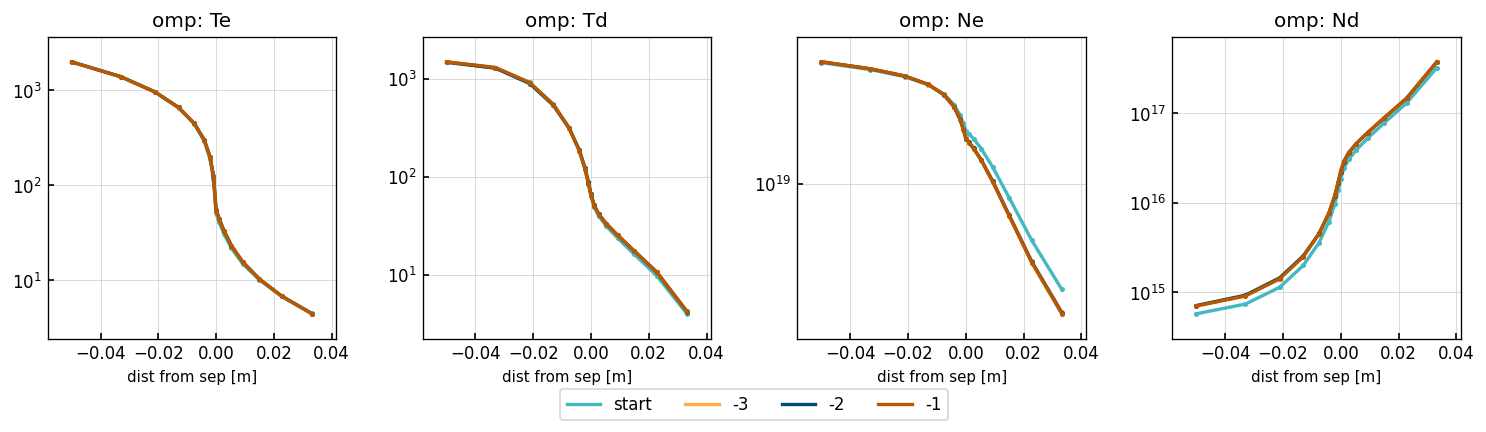

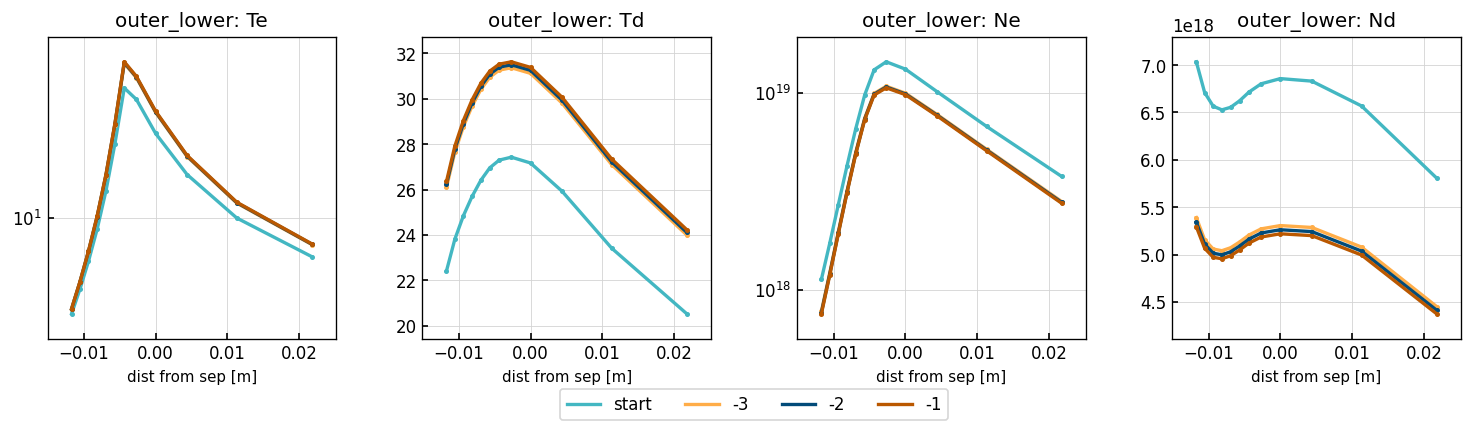

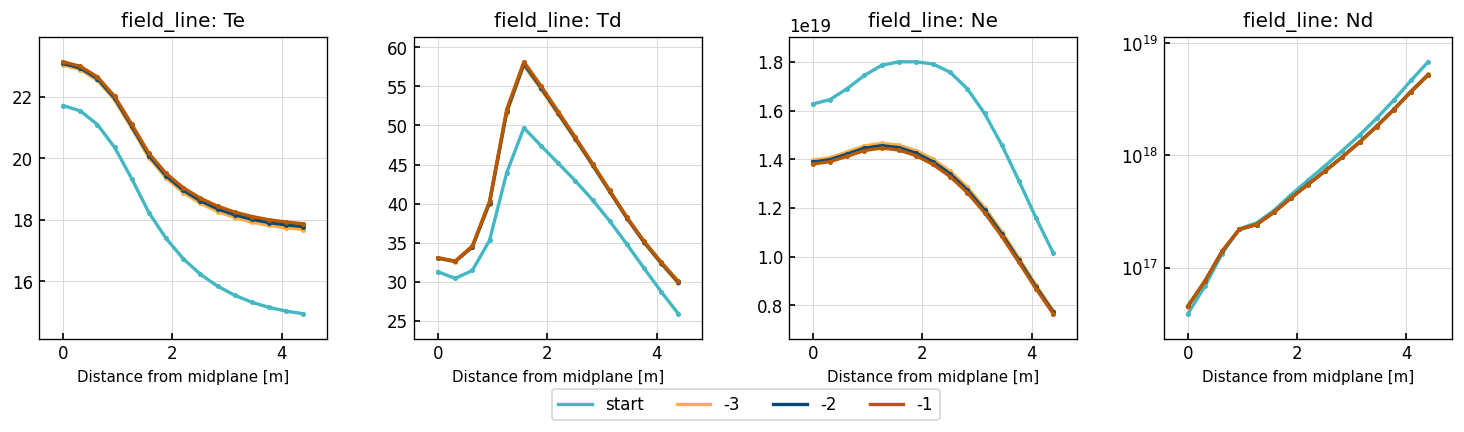

In [9]:
case = "pilut_dynamic"
lineplot(
    {
        "start":cs[case].ds.isel(t=0, x = slice(2,-2)),
        "-3":cs[case].ds.isel(t=-3, x = slice(2,-2)),
        "-2":cs[case].ds.isel(t=-2, x = slice(2,-2)),
        "-1":cs[case].ds.isel(t=-1, x = slice(2,-2)),
        # "base":cs["base"].ds.isel(t=-1, x = slice(2,-2)),

    },
    clean_guards = False,
    params = ["Te", "Td", "Ne", "Nd"],
    regions = ["omp", "outer_lower", "field_line"],
)

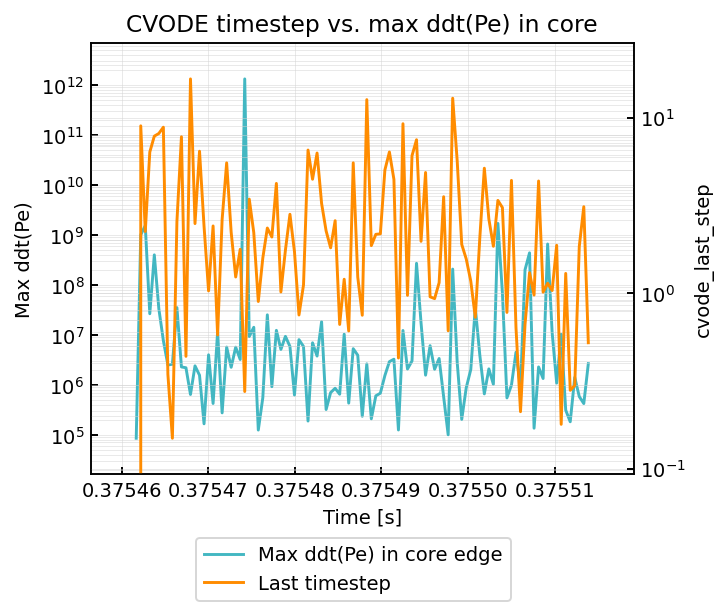

In [104]:
core = ds.hermesm.select_region("core_edge").squeeze()
fig, ax = plt.subplots()
ax.set_yscale("log")
ax2 = ax.twinx()
ax2.set_yscale("log")

# core.dims
core["ddt(Pe)"].max("theta").plot(ax = ax, label = "Max ddt(Pe) in core edge")
ds["cvode_last_step"].plot(ax = ax2, c = "darkorange", label = "Last timestep")

ax.set_title("CVODE timestep vs. max ddt(Pe) in core")
ax2.set_title("")
ax.set_ylabel("Max ddt(Pe)")
# ax2.set_ylabel("CVODE timestep")

fig.legend(loc = "upper center", bbox_to_anchor=(0.5, 0))

In [139]:
%matplotlib widget

In [138]:
cs.keys()

dict_keys(['base_steady', 'euclid_default', 'pilut_default', 'remkit_default'])

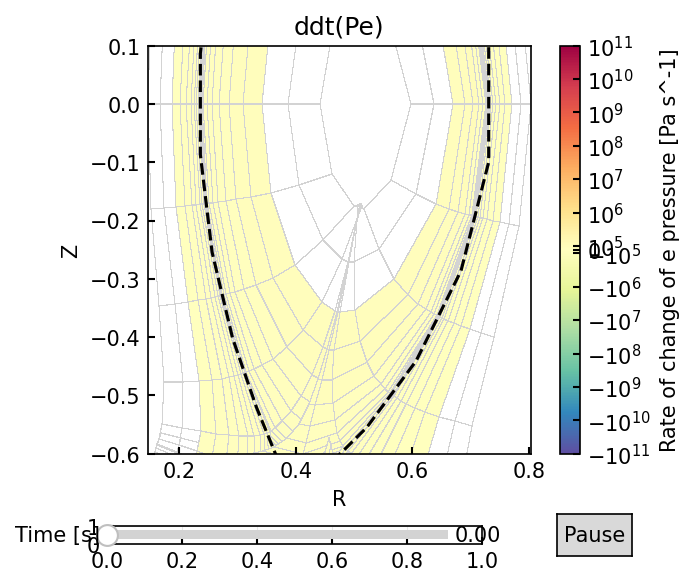

In [140]:
plt.close("all")

ds = cs["euclid_default"].ds

fig, ax = plt.subplots(dpi = 150)

anim = xbout.plotting.animate.animate_poloidal(
    ds["ddt(Pe)"].hermesm.clean_guards(), ax = ax, cmap = "Spectral_r",
    targets = False,
    logscale = True,
    vmin = -1e11,
    vmax = 1e11,
    color = "lightgrey",
    lw = 0.01)

ax.set_ylim(-0.6, 0.1)
ax.grid(False)

In [69]:
%matplotlib inline

TypeError: xbout.boutdataarray.BoutDataArrayAccessor.polygon() got multiple values for keyword argument 'ax'

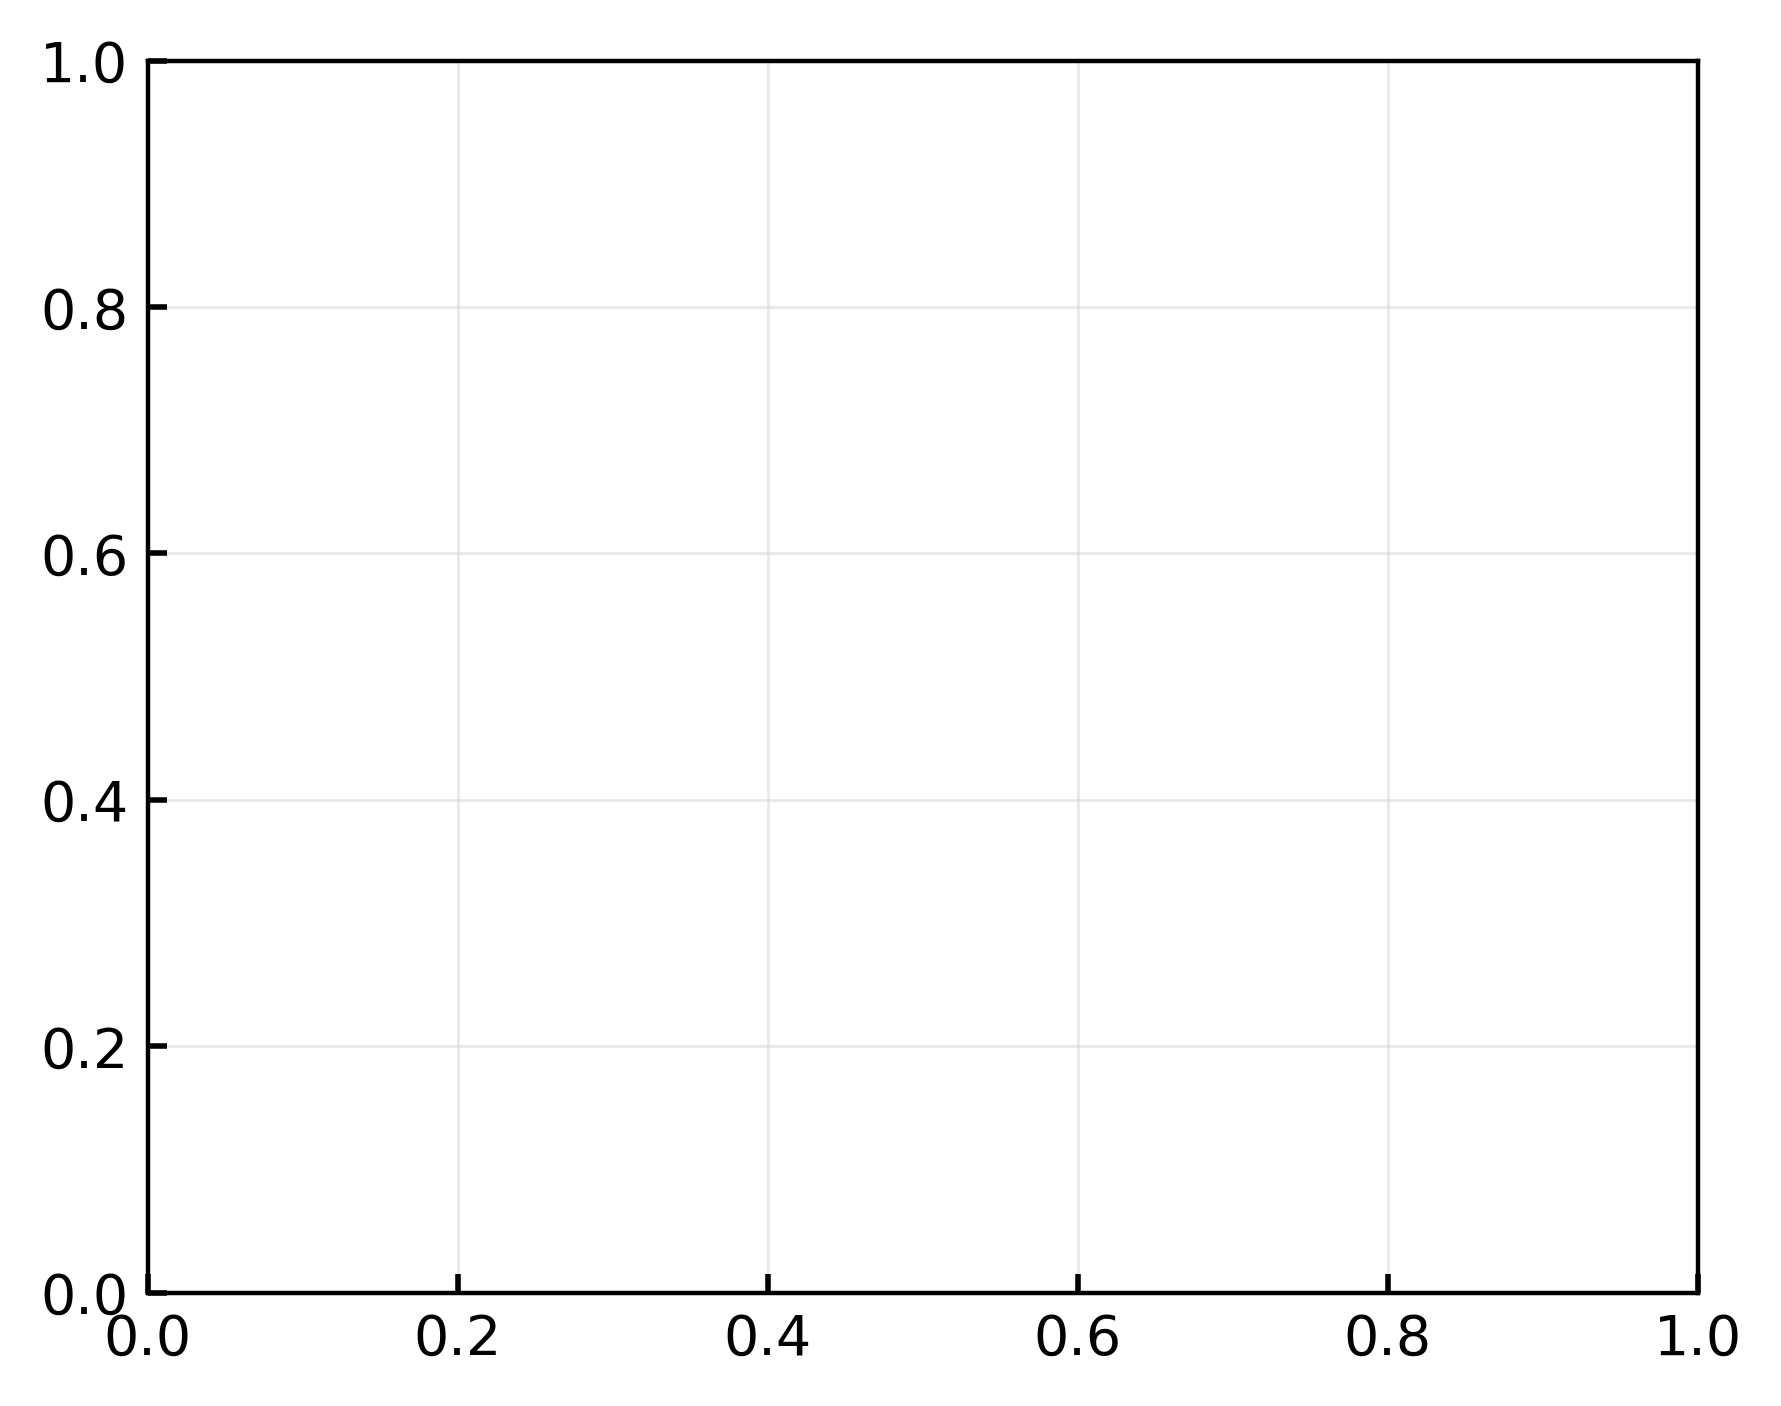

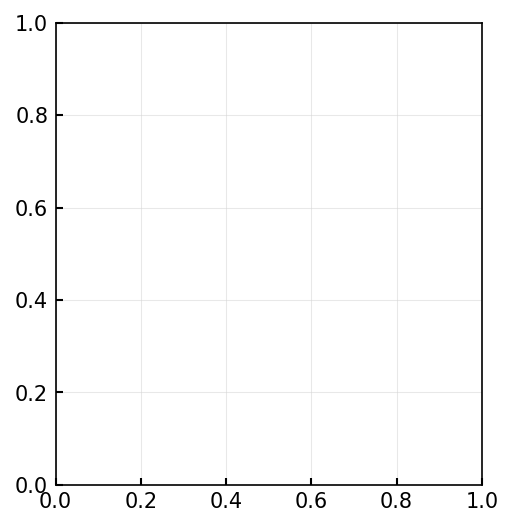

In [320]:
fig, ax = plt.subplots(dpi = 400)


plot2d(
    [
        # dict(data = ds["Nd"]),
        dict(data = abs(ds["ddt(Nd+)"] / ds["ddt(Nd+)"].attrs["conversion"]).hermesm.clean_guards().isel(t=-1), logscale = True, vmin = 10, vmax = 1000),
        ], 
        ylim = (-0.85, 0.1),
        clean_guards = True,
        title = "ddt(Nd+)",
        ax = ax)

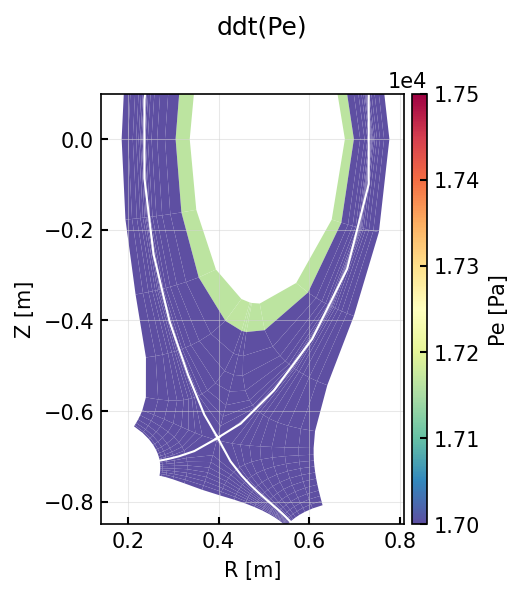

In [87]:
# fig, ax = plt.subplots()


plot2d(
    [
        # dict(data = ds["Nd"]),
        dict(data = abs(ds["Pe"]).isel(t=-1), logscale = True, vmin = 17000, vmax = 17500),
        ], 
        ylim = (-0.85, 0.1),
        clean_guards = True,
        logscale = False,
        title = "ddt(Pe)")
